In [9]:
##########################################################################
# Created on Sat Nov 16 22:23:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

### Defination

$$\mathit{\nu}=\frac{\partial \mathit{\Pi}}{\partial \sigma}\tag{12-19}$$
where,\
$\nu$:Option vega\
$\mathit{\Pi}$:Option price\
$\sigma$:Underlying stock volatility

# 12.4.1.Vega of European option

### 1.Mathimatical expression

$$\mathit{\nu}=S_0\sqrt{T}N'(d_1)\tag{12-20}$$
where,\
$d_1=\frac{ln(S_0/K)+(r+\sigma ^2/2)T}{\sigma \sqrt{T}}$\
$N'(x)=\frac{1}{\sqrt{2\pi}}e^{-x^2/2}$\
After rearrangement,\
$$\mathit{\nu}=\frac{S_0\sqrt{T} e^{-{d_1}^2/2}}{\sqrt{2\pi}}\tag{12-21}$$

### 2.Implementation

In [10]:
def vega_EurOpt(S,K,sigma,r,T):
    '''Define a function to calculate vega of European option.
    S:underlying price
    K:strike price
    sigma:volatility of underlying asset return(annualized)
    r:risk free rate(continuous compound)
    T:tenor in year'''

    from numpy import exp,log,pi,sqrt
    
    d1=(log(S/K)+(r+pow(sigma,2)/2)*T)/(sigma*sqrt(T))
    
    vega=S*sqrt(T)*exp(-pow(d1,2)/2)/sqrt(2*pi)
    
    return vega

In [11]:
S_ABC=3.27
K_ABC=3.6
sigma_ABC=0.19
shibor_6M=0.02377
T_ABC=0.5

vega_Eur=vega_EurOpt(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC)
print('Vega of European call option of ABC is',round(vega_Eur,4))

Vega of European call option of ABC is 0.7886


In [12]:
sigma_chg=0.01
value_chg=vega_Eur*sigma_chg

print('Change of option price when volatility increases 1% is ',round(value_chg,4))

Change of option price when volatility increases 1% is  0.0079


# 12.4.2.Relationship between underlying price,tenor and Vega

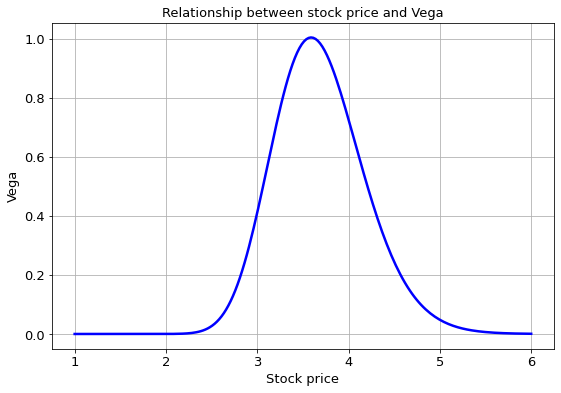

In [13]:
import matplotlib.pyplot as plt
import numpy as np

S_list2=np.linspace(1.0,6.0,200)

vega_list=vega_EurOpt(S=S_list2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC)

plt.figure(figsize=(9,6))
plt.plot(S_list2,vega_list,'b-',lw=2.5)
plt.xlabel('Stock price',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Vega',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between stock price and Vega',fontsize=13)
plt.grid()
plt.show()

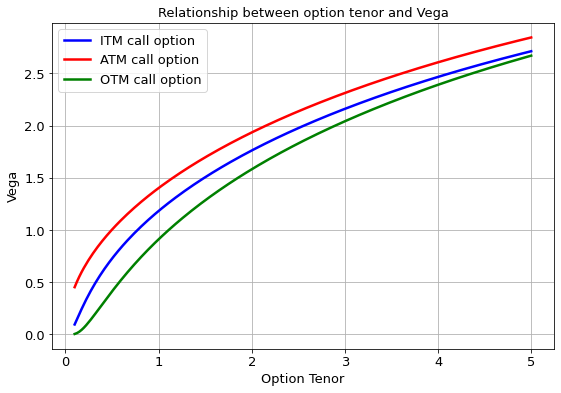

In [14]:
S1=4.0 #In the money call
S2=3.6 #At the money call
S3=3.0 #Out the money call

T_list=np.linspace(0.1,5.0,200)

vega_list1=vega_EurOpt(S=S1,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list)
vega_list2=vega_EurOpt(S=S2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list)
vega_list3=vega_EurOpt(S=S3,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list)

plt.figure(figsize=(9,6))
plt.plot(T_list,vega_list1,'b-',label='ITM call option',lw=2.5)
plt.plot(T_list,vega_list2,'r-',label='ATM call option',lw=2.5)
plt.plot(T_list,vega_list3,'g-',label='OTM call option',lw=2.5)
plt.xlabel('Option Tenor',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Vega',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between option tenor and Vega',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

# 12.4.3.Vega of American option

### Defination

$$\mathit{\nu}=\frac{\tilde{\mathit{\Pi}}-\mathit{\Pi}}{\Delta \sigma}\tag{12-22}$$

In [18]:
def vega_AmerCall(S,K,sigma,r,T,N):
    '''Define a function to calculate American call option Vega using N steps binomial tree.
    S:underlying price at t0
    K:strike price
    sigma:volatility of underlying asset return(annualized)
    r:risk free rate(continuous compound)
    T:tenor in year
    N:number of step in the BTM model'''

    import utils
    
    Value1=utils.American_call(S,K,sigma,r,T,N)
    Value2=utils.American_call(S,K,sigma+0.0001,r,T,N)
    vega=(Value2-Value1)/0.0001
    
    return vega

In [19]:
def vega_AmerPut(S,K,sigma,r,T,N):
    '''Define a function to calculate American put option Vega using N steps binomial tree.
    S:underlying price at t0
    K:strike price
    sigma:volatility of underlying asset return(annualized)
    r:risk free rate(continuous compound)
    T:tenor in year
    N:number of step in the BTM model'''

    import utils
    
    Value1=utils.American_put(S,K,sigma,r,T,N)
    Value2=utils.American_put(S,K,sigma+0.0001,r,T,N)
    vega=(Value2-Value1)/0.0001
    
    return vega

In [20]:
step=100

vega_AmerOpt1=vega_AmerCall(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step)
vega_AmerOpt2=vega_AmerPut(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step)

print('Vega of American call option of ABC is ',round(vega_AmerOpt1,4))
print('Vega of American put option of ABC is ',round(vega_AmerOpt2,4))

Vega of American call option of ABC is  0.7992
Vega of American put option of ABC is  0.7327
